In [1]:
import os
import zipfile

In [4]:
local_zip = 'dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
base_dir = '/tmp/dataset'
train_dir = base_dir
train_garbage_dir = os.path.join(base_dir, 'garbage')

In [7]:
os.listdir(train_garbage_dir)

['2.jpg', '1.jpg', '4.jpg', '3.jpg', '5.jpg']

In [32]:
import tensorflow as tf
import keras

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(5, activation='softmax')  
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 25 images belonging to 5 classes.


In [22]:
history = model.fit(train_generator,
                              steps_per_epoch=5,
                              epochs=5,
                              verbose=2)

Epoch 1/5
5/5 - 1s - loss: 2.9958 - accuracy: 0.2000
Epoch 2/5
5/5 - 1s - loss: 2.9958 - accuracy: 0.1200
Epoch 3/5
5/5 - 1s - loss: 2.9958 - accuracy: 0.2800
Epoch 4/5
5/5 - 1s - loss: 2.9958 - accuracy: 0.1600
Epoch 5/5
5/5 - 1s - loss: 2.9958 - accuracy: 0.2400


In [54]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model_tf.predict(images)
  
  print(classes)

Saving 2.jpg to 2.jpg
[[1.4536333e-04 9.9946112e-05 5.1276904e-01 4.0461946e-01 8.2366183e-02]]


<Figure size 432x288 with 0 Axes>

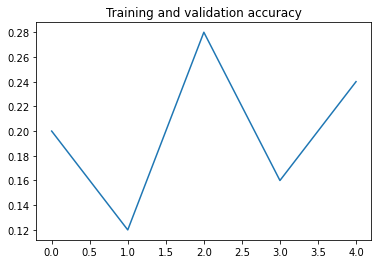

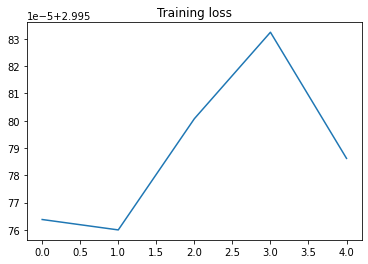

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc      = history.history[     'accuracy' ]
loss     = history.history[    'loss' ]
epochs = range(len(acc))

plt.plot  ( epochs,     acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.title ('Training loss')
plt.figure()

In [49]:
# Load the library
from tensorflow.keras.models import load_model
# Save the model using TensorFlow SavedModel format
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [50]:
model_tf = load_model('my_model')

In [55]:
from keras.preprocessing import image
import keras
from tensorflow.keras.models import load_model

def extract(path):
    """
    input: path to image
    output: list of class probabilities
    """
    model_tf = load_model('my_model')
    img=image.load_img(path, target_size=(150, 150))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model_tf.predict(images)
    return classes

In [ ]:
img=image.load_img('/tmp/', target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

In [53]:
! zip -r my_model.zip my_model/

updating: my_model/ (stored 0%)
  adding: my_model/saved_model.pb (deflated 89%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.index (deflated 64%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: my_model/assets/ (stored 0%)
